In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.shape

(53940, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

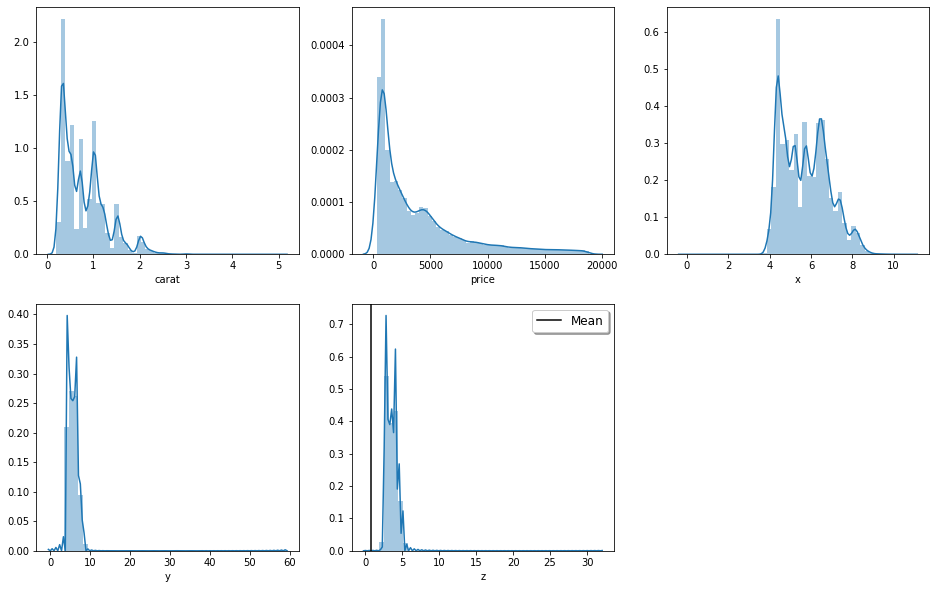

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(2, 3, 1)
sns.distplot(df['carat'])

plt.subplot(2, 3, 2)
sns.distplot(df['price'])

plt.subplot(2, 3, 3)
sns.distplot(df['x'])

plt.subplot(2, 3, 4)
sns.distplot(df['y'])

plt.subplot(2, 3, 5)
sns.distplot(df['z'])



plt.axvline(df['carat'].mean(), color="black", label="Mean")
plt.legend(shadow=True,fontsize="larger")


In [8]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
counts_cut = df['cut'].value_counts()
counts_cut

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Text(0, 0.5, 'Count')

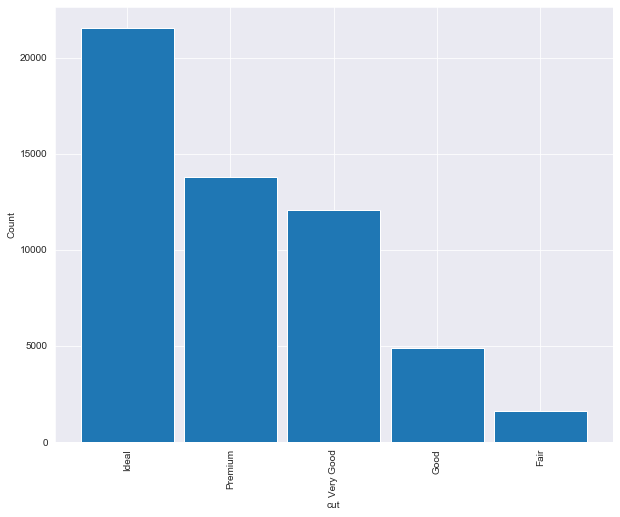

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
counts_cut.plot(kind='bar' , width=0.9)
plt.xlabel('cut')
plt.ylabel('Count')

In [11]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
counts_color = df['color'].value_counts()
counts_color

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [13]:
counts_color = df['color'].value_counts()
counts_color

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Text(0, 0.5, 'Count')

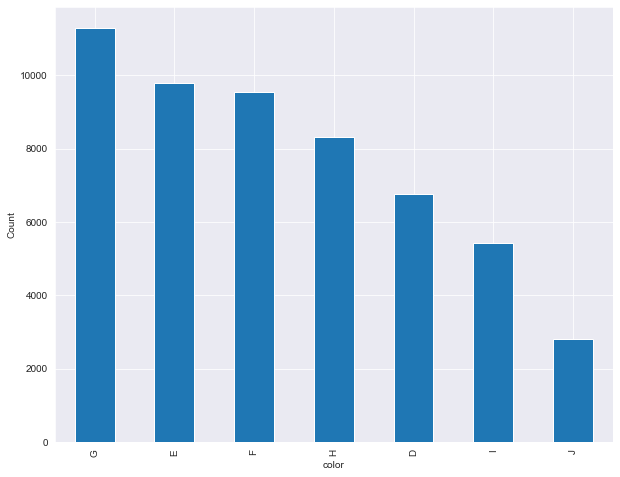

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
counts_color.plot(kind='bar')
plt.xlabel('color')
plt.ylabel('Count')

In [15]:
counts_clarity = df['clarity'].value_counts()
counts_clarity

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Text(0, 0.5, 'Count')

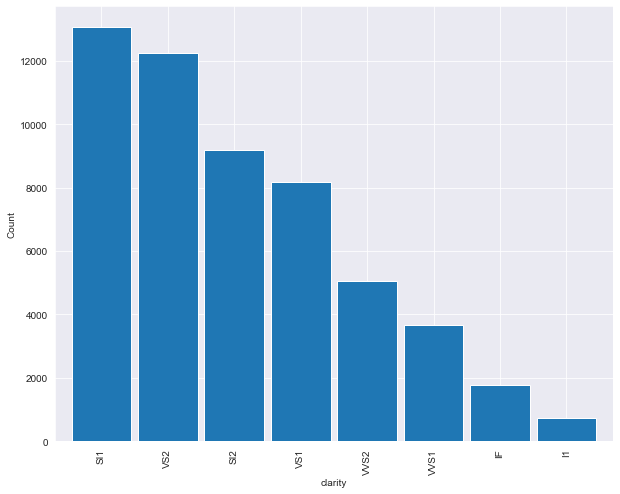

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
counts_clarity.plot(kind='bar' , width=0.9)
plt.xlabel('clarity')
plt.ylabel('Count')

In [17]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


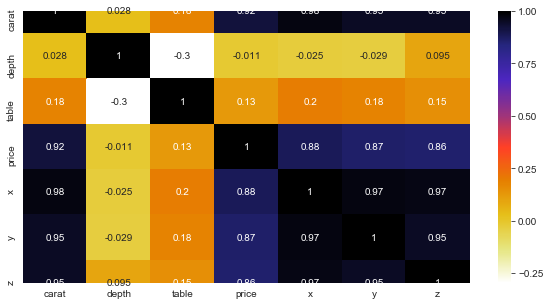

In [18]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True ,cmap=plt.cm.CMRmap_r);

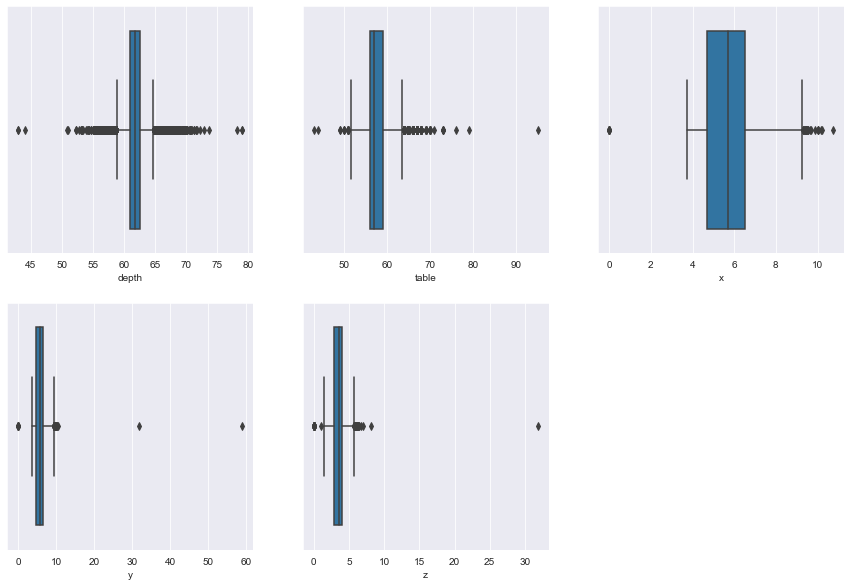

In [19]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.subplot(2, 3, 1)
sns.boxplot(df['depth'])
plt.subplot(2, 3, 2)
sns.boxplot(df['table'])
plt.subplot(2, 3, 3)
sns.boxplot(df['x'])
plt.subplot(2, 3, 4)
sns.boxplot(df['y'])
plt.subplot(2, 3, 5)
sns.boxplot(df['z'])

In [20]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

## Normalising the data:

In [21]:
# MinMaxScaller for Numerical column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

,carat,depth,table,price,x,y,z
0,0.006237,0.469298,0.333333,0.000000,0.031384,0.043732,0.075203
1,0.002079,0.394737,0.500000,0.000000,0.022825,0.023324,0.050813
2,0.006237,0.267544,0.611111,0.000054,0.045649,0.056851,0.050813
3,0.018711,0.508772,0.416667,0.000433,0.067047,0.080175,0.115854
4,0.022869,0.548246,0.416667,0.000487,0.087019,0.097668,0.140244


## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['cut']=le.fit_transform(df['cut'])
df['color']=le.fit_transform(df['color'])
df['clarity']=le.fit_transform(df['clarity'])

In [25]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
X= df.drop(["price"],axis =1)
y= df["price"]

In [27]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


## Without sklearn- KNN

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_numerical, y, test_size =  1/4, random_state = 0)

In [29]:
y_train=np.array(y_train)

In [30]:
X_test=np.array(X_test)

In [31]:
y_test=np.array(y_test)

In [32]:
X_train=np.array(X_train)


In [33]:
distance=np.zeros(y_test.shape)
y_test_pred=np.zeros(y_test.shape)
k=3
for i in range(len(X_test)):
    distance=np.sqrt(((X_test[i]-X_train)**2).sum(axis=1))
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
    y_test_pred[i]=y_train[sort_value].mean()
print(y_test_pred)

[5217.33333333 1694.66666667 2611.         ...  686.         1033.
 1607.66666667]


In [34]:
y_test_pred.shape

(13477,)

In [35]:
y_test.shape

(13477,)

## accuracy

In [36]:
from sklearn import metrics
acu=metrics.r2_score(y_test,y_test_pred)
acu

0.9991247314613471

## Using Scikit Learn Library

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn import metrics

In [38]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)  
pred=model.predict(X_test) 
skl_acu=metrics.r2_score(y_test,pred)

## Comparing the R2 Scores

In [39]:
print("Accuracy calculated using Scikitlearn:",skl_acu)
print("Accuracy calculated with out using Scikitlearn:",acu)

Accuracy calculated using Scikitlearn: 0.9991247314613471
Accuracy calculated with out using Scikitlearn: 0.9991247314613471
